<b>1. Use the data given in Data Core_Swi_SM.xlsx file to build a data-driven model of Irreducible Water
Saturation of Core Samples. The data is from core measurements of porosity in %, TOC content in %,
Quartz in wt%, Calcite in wt%, and irreducible water saturation (Swirr) in %</b>

In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()
from sklearn.tree import export_graphviz
import pydot
from IPython.display import Image
from scipy.stats import spearmanr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
#load the data
df=pd.read_excel('Core_Swi_SM.xlsx')
df.head()

,Depth,Porosity,TOC,Quartz,Calcite,Swirr
0,2773.88,6.78,4.3,40.1,0.0,6.999580
1,2776.00,6.17,4.4,50.5,6.5,9.163555
2,2778.13,4.99,3.5,42.6,2.6,5.775995
3,2780.25,6.10,0.4,4.8,69.7,11.773500
4,2782.48,5.72,4.1,38.5,0.6,7.096080


<b>1.1 Perform EDA and summarize your findings.</b>

In [3]:
#shape
df.shape

(167, 6)

In [4]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Depth     167 non-null    float64
 1   Porosity  167 non-null    float64
 2   TOC       167 non-null    float64
 3   Quartz    167 non-null    float64
 4   Calcite   167 non-null    float64
 5   Swirr     167 non-null    float64
dtypes: float64(6)
memory usage: 8.0 KB


In [5]:
#describe
df.describe()

,Depth,Porosity,TOC,Quartz,Calcite,Swirr
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,2951.453293,4.328204,3.924551,29.079641,12.726347,10.734370
std,106.071325,1.376384,1.691170,14.429544,20.808954,5.108082
min,2773.880000,0.880000,0.400000,0.000000,0.000000,2.463680
25%,2862.655000,3.455000,2.800000,18.150000,0.000000,6.857675
50%,2945.910000,4.460000,4.100000,30.900000,2.500000,10.203875
75%,3039.715000,5.285000,5.100000,39.800000,13.350000,13.336175
max,3147.210000,8.190000,7.800000,61.800000,82.500000,27.805980


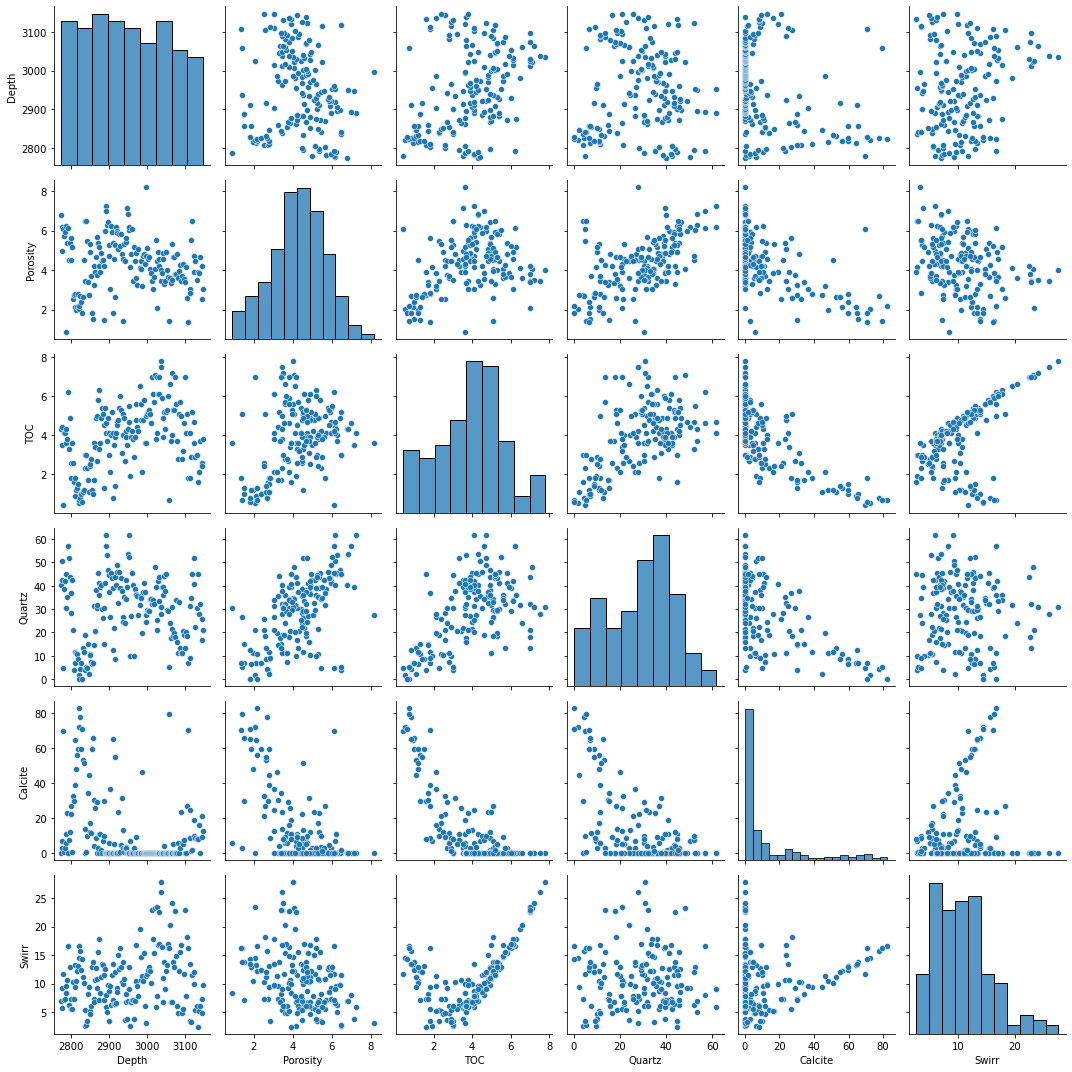

In [6]:
#plot pairplot
sns.pairplot(df)
plt.tight_layout()
plt.show()

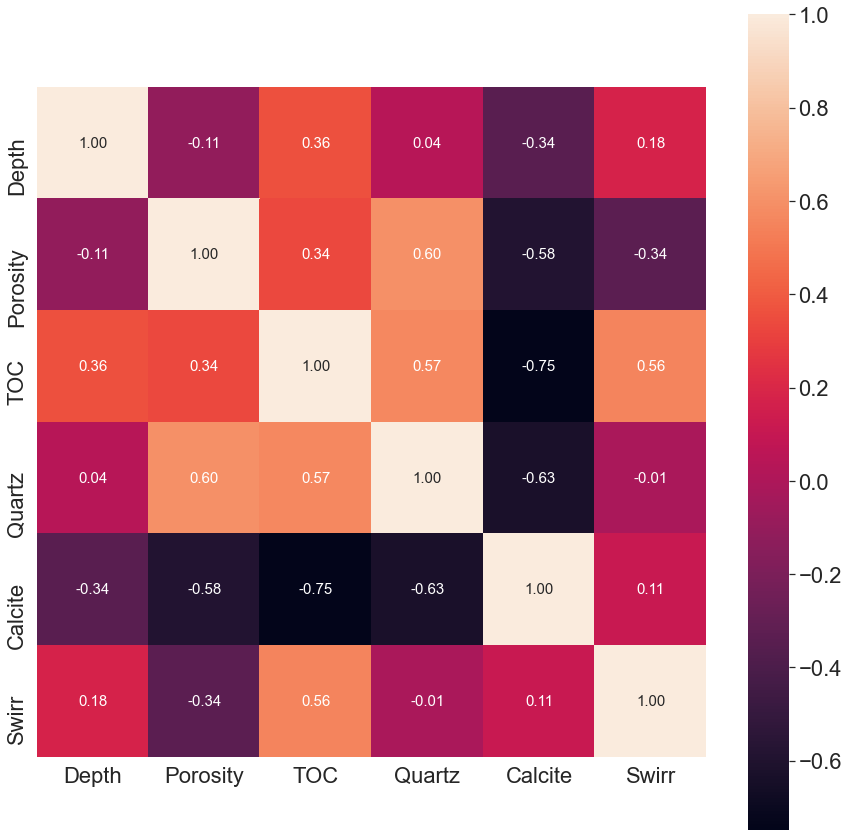

In [7]:
#corr coeff.
cm = np.corrcoef(df.values.T)
all_columns = list(df.columns)
# plot correlation matrix
plt.figure(figsize=(15, 15))
sns.set(font_scale=2)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, annot_kws={'size': 15},
                  fmt='.2f', yticklabels=all_columns, xticklabels=all_columns)
plt.show()

In [8]:
#create a histogram plot for all columns one by one
for i in df.columns:
    df[i].iplot(kind='box',color='green',title=str('Box Plot of '+str(i)))

In [9]:
#check for null
df.isnull().sum()

Depth       0
Porosity    0
TOC         0
Quartz      0
Calcite     0
Swirr       0
dtype: int64

There is no correlation between Swirr and porosity,quartz, while the correlation between Swirr and TOC is higher as compared to other features. There are no null values in the dataset.

<b>1.2 Make the depth an index</b>

In [10]:
#Make the depth an index
df_ = df.set_index('Depth')
df_.head()

,Porosity,TOC,Quartz,Calcite,Swirr
Depth,,,,,
2773.88,6.78,4.3,40.1,0.0,6.999580
2776.00,6.17,4.4,50.5,6.5,9.163555
2778.13,4.99,3.5,42.6,2.6,5.775995
2780.25,6.10,0.4,4.8,69.7,11.773500
2782.48,5.72,4.1,38.5,0.6,7.096080


<b>1.3 Plot Swirr vs. depth</b>

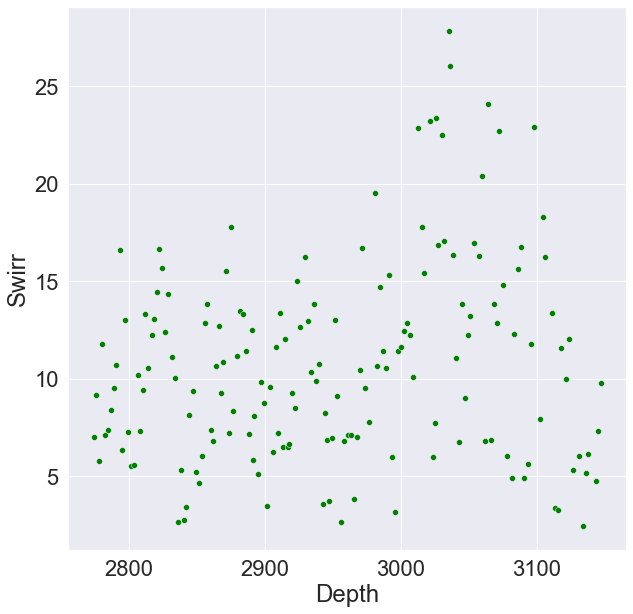

In [11]:
#Plot Swirr vs. depth
plt.subplots(figsize=(10, 10))
sns.scatterplot(df['Depth'] , df['Swirr'] , color="green")                                                          
plt.show()

<b>1.4 Calculate the correlation matrix using spearman method and plot it.</b>

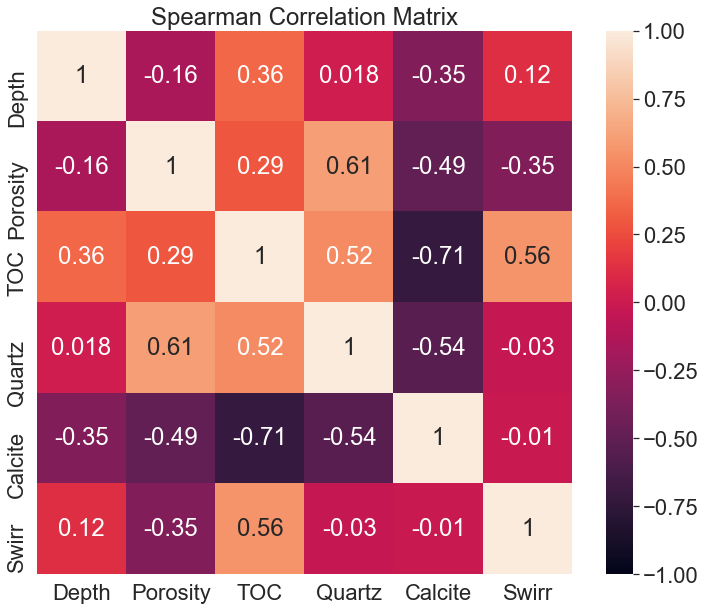

In [12]:
#correlation matrix using spearman method
corr_mat = df.corr(method="spearman")
plt.figure(figsize=(12,10))
sns.heatmap(corr_mat, vmin=-1, vmax=1, annot=True)
plt.title("Spearman Correlation Matrix")
plt.show()

<b>1.5 Perform train-test split. Use 80% of data as the training set. The remaining as testing set.</b>

In [13]:
#definingh X and y
X = df.drop('Swirr',axis=1)
y = df.Swirr

In [14]:
#train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

<b>1.6 Train the LinearRegression model using default values for all hyper-parameters.</b>

In [15]:
#Creating linear regression model
lm=LinearRegression()
#fit the model
lm.fit(X_train,y_train)

LinearRegression()

In [16]:
#predict
pred_train_lm=lm.predict(X_train)
pred_test_lm=lm.predict(X_test)

In [17]:
#r^2 for train
train_set_r2_lm = r2_score(pred_train_lm, y_train)
print('Train r^2:',round(train_set_r2_lm,4))

Train r^2: 0.9661


In [18]:
#r^2 for test
test_set_r2_lm = r2_score(y_test,pred_test_lm)
print('Testing r^2:',round(test_set_r2_lm,4))

Testing r^2: 0.9736


In [19]:
print('Training Score: ',lm.score(X_train, y_train),'\n' 'Testing Score: ',lm.score(X_test, y_test))

Training Score:  0.9671667753207316 
Testing Score:  0.9735933901833679


<b>1.7 Train the Lasso model using alpha = 1 and default values for all other hyper-parameters.</b>

In [20]:
#Lasso Model and fit
lasso = Lasso(alpha=1).fit(X_train, y_train)

In [21]:
#predict
pred_train_lasso=lasso.predict(X_train)
pred_test_lasso=lasso.predict(X_test)

In [22]:
##r^2 for train
train_set_r2_lasso = r2_score(pred_train_lasso, y_train)
print('Train r^2:',round(train_set_r2_lasso,4))

Train r^2: 0.8572


In [23]:
##r^2 for test
test_set_r2_lasso = r2_score(pred_test_lasso, y_test)
print('Testing r^2:',round(test_set_r2_lasso,4))

Testing r^2: 0.8324


In [24]:
print('Training Score: ',lasso.score(X_train, y_train),'\n' 'Testing Score: ',lasso.score(X_test, y_test))

Training Score:  0.9126115856663374 
Testing Score:  0.9012737998454551


<b>1.8 Train the k-Nearest Neighbor Regressor model using 7 neighbors and proximity metric p =2 and
default values for all other hyper-parameters.</b>


In [25]:
#knn
knn = KNeighborsRegressor(n_neighbors=7, p=2)

In [26]:
#fit
knn.fit(X_train, y_train) 

KNeighborsRegressor(n_neighbors=7)

In [27]:
#predict
pred_train_knn = knn.predict(X_train)
pred_test_knn = knn.predict(X_test)

In [28]:
#r^2 for train
train_set_r2_knn = r2_score(pred_train_knn, y_train)
print('Train r^2:',round(train_set_r2_knn,4))

Train r^2: -0.6943


In [29]:
#r^2 for test
test_set_r2_knn = r2_score(pred_test_knn, y_test)
print('Testing r^2:',round(test_set_r2_knn,4))

Testing r^2: -1.4091


In [53]:
print('Training Score: ',knn.score(X_train, y_train),'\n' 'Testing Score: ',knn.score(X_test, y_test))

Training Score:  0.43082905365671653 
Testing Score:  0.32329522217799


<b>1.9 Train the Random Forest Regressor model using 200 estimators and default values for all other
hyper-parameters.</b>

In [42]:
#random forest
rf = RandomForestRegressor(n_estimators=200)

In [43]:
#fit
rf.fit(X_train,y_train)

RandomForestRegressor(n_estimators=200)

In [44]:
#predict
pred_train_rf=rf.predict(X_train)
pred_test_rf=rf.predict(X_test)

In [45]:
#r^2 for train
train_set_r2_rf = r2_score(y_train,pred_train_rf)
print('Training r^2:',round(train_set_r2_rf,4))

Training r^2: 0.9925


In [46]:
#r^2 for test
test_set_r2_rf = r2_score(y_test,pred_test_rf)
print('Testing r^2:',round(test_set_r2_rf,4))

Testing r^2: 0.9692


In [47]:
print('Training Score: ',rf.score(X_train, y_train),'\n' 'Testing Score: ',rf.score(X_test, y_test))

Training Score:  0.9925412268941404 
Testing Score:  0.9691649999559996


<b>1.10 Evaluate and compare the performance of the previous model on the testing and training data.
Comment on your findings.</b>

| Model | Accuracy Score (Train) | Accuracy Score (Test) |
| --- | --- | --- |
| LinearRegression | 0.96 | 0.97 |
| Lasso Model | 0.85 | 0.83 |
| k-Nearest Neighbor | 0.43 | 0.32 |
| Random Forest | 0.99 | 0.96 |

We can see that linerar regression perform better with accuracy score of 97% 

<b>1.11 Instantiate a model for 3-fold cross validation on training data that shuffles the selection of
samples from the training dataset into the folds for cross validation.</b>

In [37]:
cross_val_r2_score = cross_val_score(rf, X, y,cv=5,scoring='r2')
print("R^2 Cross-validation Score: ",cross_val_r2_score, '\n'"Mean R^2 Cross-validation Score: ", cross_val_r2_score.mean())

R^2 Cross-validation Score:  [0.90799474 0.94392232 0.9608022  0.94003655 0.92635438] 
Mean R^2 Cross-validation Score:  0.9358220384589018


<b>1.12 Using the cross-validation instantiated above, perform hyperparameter optimization for the
Regression Forest Regressor to find the best/optimal values of hyperparameters:
min_samples_leaf, max_features, max_depth.
Display the best/optimal values of hyperparameters.
Comment on the model performance using the best/optimal values of hyperparameters.</b>

In [38]:
h_param={
    'min_samples_leaf':[2, 4, 8, 10, 16],
    'max_features':['auto','sqrt','log2',None],
    'max_depth':[15, 25, 35, 45, 75, 85, 100],  
}

In [39]:
grid_search=GridSearchCV(estimator=rf,
                      param_grid=h_param,
                      cv=10,n_jobs=-1,verbose=2)

In [40]:
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 140 candidates, totalling 1400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   15.0s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   38.4s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1400 out of 1400 | elapsed:  2.6min finished


GridSearchCV(cv=10,
             estimator=RandomForestRegressor(n_estimators=200, n_jobs=-1),
             n_jobs=-1,
             param_grid={'max_depth': [15, 25, 35, 45, 75, 85, 100],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'min_samples_leaf': [2, 4, 8, 10, 16]},
             verbose=2)

In [55]:
print('Best value cross-val : ',grid_search.best_score_,'\n' 'with parameters: ', grid_search.best_params_)

Best value cross-val :  0.9156687493900068 
with parameters:  {'max_depth': 75, 'max_features': None, 'min_samples_leaf': 2}


we can clearly see that there is not much changes in accuracy scores